# <font color=red>Question 1</font>

In [272]:
import pandas as pd #for dataframes
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for visualization
%matplotlib inline #for displaying plots
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [273]:
bank_data = pd.read_excel("bank_train.xlsx")
#drop duplicates
bank_data = bank_data.drop_duplicates() 

Checking the first and last 10 rows of the data to get an overview and see if the dataset contains any inconsistencies and issues.

In [275]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
3,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
4,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
5,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
6,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
7,39,services,married,secondary,no,9374,yes,no,unknown,20,may,273,1,-1,0,unknown,no
8,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
9,31,blue-collar,married,secondary,no,360,yes,yes,cellular,29,jan,89,1,241,1,failure,no


In [276]:
bank_data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3155,42,admin.,married,unknown,no,642,yes,yes,unknown,16,may,509,2,-1,0,unknown,no
3156,51,technician,married,tertiary,no,2506,no,no,cellular,30,nov,210,3,-1,0,unknown,no
3157,36,technician,divorced,secondary,no,566,yes,no,unknown,20,may,129,2,-1,0,unknown,no
3158,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
3159,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
3160,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
3161,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
3162,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
3163,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
3164,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [277]:
# select rows from dataframe
x = bank_data.iloc[:,:-1]
# sum of null data based on attributes
x.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [278]:
# select columns from dataframe
y = bank_data.iloc[:,-1]
# sum of null data based on observations
y.isnull().sum()

0

In [279]:
bank_data.shape

(3165, 17)

In [280]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000
mean,41.250553,1411.638231,15.971248,265.225276,2.781991,39.356714,0.568720
std,10.664465,3069.183919,8.227302,254.049840,3.135256,99.738622,1.798678
min,19.000000,-2082.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,67.000000,9.000000,106.000000,1.000000,-1.000000,0.000000
50%,39.000000,437.000000,16.000000,187.000000,2.000000,-1.000000,0.000000
75%,49.000000,1451.000000,21.000000,334.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,2456.000000,50.000000,871.000000,25.000000


DataFrame.describe() function above shows that there are outliers in the "balance" column as it has a value of three standard deviations away from the mean. This fact is strenghten through visualization by plotting a box plot below.

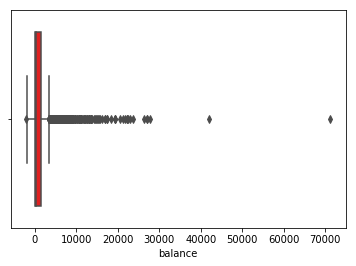

In [281]:
sns.boxplot(x=bank_data['balance'], color = 'red')

Hence, we'll filter the outliers in "balance" column using Z-score

In [282]:
bank_data[['balance']].mean()

bank_data['balance_outliers'] = bank_data['balance']
bank_data['balance_outliers']= zscore(bank_data['balance_outliers'])

bank_z = (bank_data['balance_outliers']>3) | (bank_data['balance_outliers']<-3)
bank_data = bank_data.drop(bank_data[bank_z].index, axis = 0, inplace = False)

In [283]:
bank_data = bank_data.drop('balance_outliers', axis = 1)

In [284]:
bank_data.shape

(3106, 17)

In [285]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000
mean,41.211526,1111.005473,15.980361,266.597875,2.780425,39.308113,0.567611
std,10.669263,1776.197429,8.235968,255.329171,3.123865,99.812672,1.802155
min,19.000000,-2082.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,63.000000,9.000000,106.000000,1.000000,-1.000000,0.000000
50%,39.000000,425.000000,16.000000,187.000000,2.000000,-1.000000,0.000000
75%,49.000000,1327.000000,21.000000,336.750000,3.000000,-1.000000,0.000000
max,87.000000,10378.000000,31.000000,2456.000000,50.000000,871.000000,25.000000


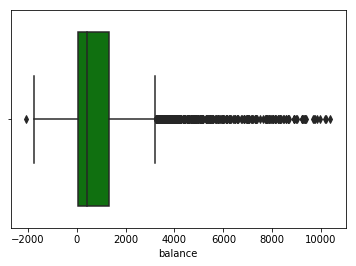

In [286]:
sns.boxplot(x=bank_data['balance'], color = 'green')

## What are the types of the attributes?

In [287]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3106 entries, 0 to 3164
Data columns (total 17 columns):
age          3106 non-null int64
job          3106 non-null object
marital      3106 non-null object
education    3106 non-null object
default      3106 non-null object
balance      3106 non-null int64
housing      3106 non-null object
loan         3106 non-null object
contact      3106 non-null object
day          3106 non-null int64
month        3106 non-null object
duration     3106 non-null int64
campaign     3106 non-null int64
pdays        3106 non-null int64
previous     3106 non-null int64
poutcome     3106 non-null object
y            3106 non-null object
dtypes: int64(7), object(10)
memory usage: 436.8+ KB


## Any unused or irrelevant columns/attributes? 

The dataset contains categorical and numerical variables. Since there's not much description of the the attributes we'll be assuming the meaning for some of the attributes since 'Question 2' labelled the dataset as bank marketing data. Contact attribute is obviously irrelevant as it just tells you the method for the bank to contact potential customers. 

We're assuming day, month, duration, campaign, pdays, previous and poutcome are attributes which related to marketing which only act to inform potential customers of the bank's services and products. But ultimately customers' financial status and background are the deciding factors for them subscribing to the bank short term deposit. Thus, column 8 - 15 are irrelevant in building a  predective model based on bank client's background. 

## What do you do to them?

Unused or irrelevant columns will be dropped/deleted using DataFrame.drop() function because we'll only be needing the data from the relevant attributes to feed into our predictive model.

In [288]:
bank_data_1 = bank_data.drop(bank_data.columns[8:-1], axis=1, inplace=True)

In [291]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,y
0,30,unemployed,married,primary,no,1787,no,no,no
1,33,services,married,secondary,no,4789,yes,yes,no
2,59,blue-collar,married,secondary,no,0,yes,no,no
3,35,management,single,tertiary,no,747,no,no,no
4,36,self-employed,married,tertiary,no,307,yes,no,no
5,39,technician,married,secondary,no,147,yes,no,no
6,41,entrepreneur,married,tertiary,no,221,yes,no,no
7,39,services,married,secondary,no,9374,yes,no,no
8,20,student,single,secondary,no,502,no,no,yes
9,31,blue-collar,married,secondary,no,360,yes,yes,no


## What attribute(s) might be useful?

Since I'm interested in building a predective model based on one's background, attributes such as job, marital, education,	default, housing, and loan are relevant and might be useful as those give you the info regarding individuals' financial standing and background information which would influence them to subscribe the bank term deposit. We'll transform some of the data here before feeding them into our machine learning algorithm.

In [294]:
bank_data.rename(index = str, columns={'y': 'deposit subscription'}, inplace = True)
bank_data['deposit subscription'] = bank_data['deposit subscription'].apply(lambda x: 0 if x == 'no' else 1)

In [295]:
bank_dummies = pd.get_dummies(bank_data, columns = ['job'])
bank_dummies = pd.get_dummies(bank_data, columns = ['education'])
bank_dummies['housing'] = bank_data['housing'].map({'yes': 1, 'no': 0})
bank_dummies['default'] = bank_data['default'].map({'yes': 1, 'no': 0})
bank_dummies['loan'] = bank_data['loan'].map({'yes': 1, 'no': 0})

In [296]:
cols = bank_dummies.columns.tolist()
cols

['age',
 'job',
 'marital',
 'default',
 'balance',
 'housing',
 'loan',
 'deposit subscription',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown']

In [301]:
bank_dummies = bank_dummies[['age','job','marital','education_primary','education_secondary','education_tertiary','education_unknown','default','balance','housing','loan','deposit subscription']]

In [302]:
bank_dummies.head(10)

,age,job,marital,education_primary,education_secondary,education_tertiary,education_unknown,default,balance,housing,loan,deposit subscription
0,30,unemployed,married,1,0,0,0,0,1787,0,0,0
1,33,services,married,0,1,0,0,0,4789,1,1,0
2,59,blue-collar,married,0,1,0,0,0,0,1,0,0
3,35,management,single,0,0,1,0,0,747,0,0,0
4,36,self-employed,married,0,0,1,0,0,307,1,0,0
5,39,technician,married,0,1,0,0,0,147,1,0,0
6,41,entrepreneur,married,0,0,1,0,0,221,1,0,0
7,39,services,married,0,1,0,0,0,9374,1,0,0
8,20,student,single,0,1,0,0,0,502,0,0,1
9,31,blue-collar,married,0,1,0,0,0,360,1,1,0


# <font color=red>Question 2</font>
Experiment with KNN machine learning algorithm to predict whether y (bank term deposit)
subscribed (yes/no) based on bank marketing data (bank_test.xlsx). Use default KNN configurations
and try at least two different values of k. Try conduct also with custom KNN configurations
with at least 5 fold cross-validation. Compare the two KNN and specify your findings.

In [328]:
x = bank_dummies.iloc[:,np.r_[0,3:10]]
# set target categorical data label
y = bank_dummies.iloc[:,11]
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [331]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [332]:
sc = StandardScaler()
sc.fit_transform(x_train, y_train)
sc.fit(x_test, y_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

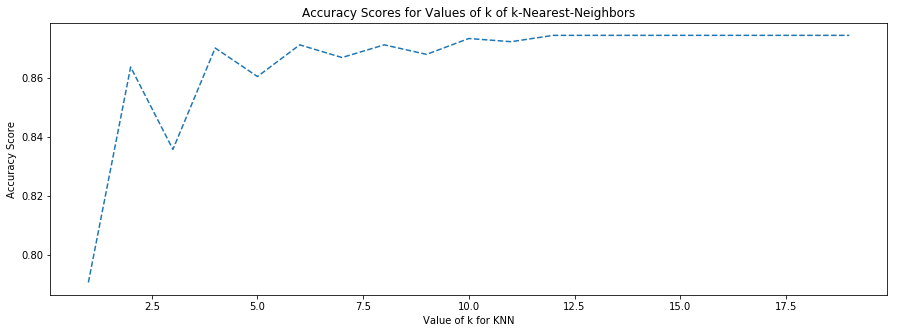

In [343]:
from sklearn.neighbors import KNeighborsClassifier
# empty variable for storing the KNN metrics
scores=[]

lrange=list(range(1,20))
# loop the KNN process
for k in lrange:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    plt.figure(2,figsize=(15,5))
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

The optimal number of neighbors is 17
The optimal score is 0.88


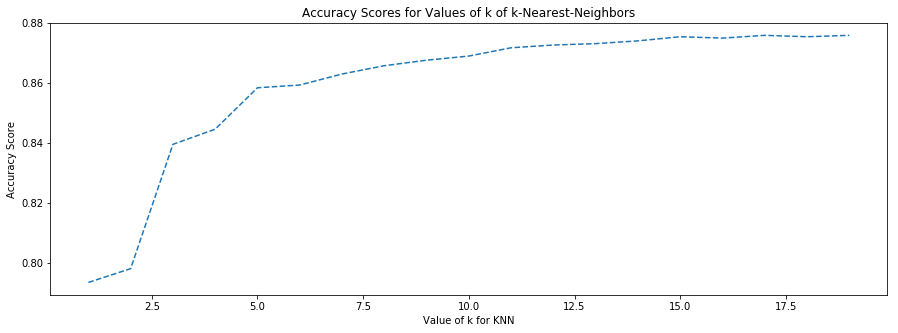

In [345]:
# import library for cross validation scoring
from sklearn.model_selection import cross_val_score
# empty variable for storing the KNN metrics
scores=[]
# We try different values of k for the KNN (from k=1 up to k=26)
lrange=list(range(1,20))
# loop the KNN process
for k in lrange:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance',algorithm='auto')
    score = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())
    
optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2,figsize=(15,5))
# plot the results

plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

#### Do higher values of k lead to better performance?
In our case, yes it does. The highest accuracy obtained using the default KNN configurations is when k is around 10 (accuracy = 0.87). The accuracy scores shows stagnation after the value of k is increased beyond 10. However, we are using the test set as a training set and as the lab suggested, we are underestimating the true error rate since our model has been forced to fit the test set in the best possible manner. Our model is then incapable of generalizing to newer observations, a process known as
overfitting. Moreover, the dataset is imbalance as shown below where a large pecentage of clients said no.

In [353]:
#bankbal = bank_data['deposit subscription ']
#df['a'].value_counts()
bank_data['deposit subscription'].value_counts()/bank_data['deposit subscription'].count()

0    0.878622
1    0.121378
Name: deposit subscription, dtype: float64

#### Do cross-validation effect KNN performance?
Yes as it shows that the optimal number of neighbors is 17 and thhe optimal score is 0.88.

Reference:

1. Sharma, N. (2018, May 23). Ways to Detect and Remove the Outliers. Retrieved from https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba. 
2. Yufengsui. (2019, June 20). 【Machine Learning Project】Bank Marketing Analytics. Retrieved from https://www.kaggle.com/yufengsui/machine-learning-project-bank-marketing-analytics/notebook.